In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# All data

In [19]:
#created in create_embeddings
X_test = pd.read_csv('../Machine_Learning/data/X_test_all.csv')
y_test = pd.read_csv('../Machine_Learning/data/y_test_all.csv')
X_train = pd.read_csv('../Machine_Learning/data/X_train_all.csv')
y_train = pd.read_csv('../Machine_Learning/data/y_train_all.csv')

In [20]:
# Count the occurrences of each value
value_counts = y_train.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 87
Percentage of entries in y_train that are 1: 10.32%


In [21]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 38
Percentage of entries in y_test that are 1: 13.48%


In [22]:
from sklearn.utils import shuffle

# Shuffle train and test set
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

X_train.to_csv('../Machine_Learning/data/X_train_shuffled_all.csv', index=False)
X_test.to_csv('../Machine_Learning/data/X_test_shuffled_all.csv', index=False)
y_train.to_csv('../Machine_Learning/data/y_train_shuffled_all.csv', index=False)
y_test.to_csv('../Machine_Learning/data/y_test_shuffled_all.csv', index=False)

In [23]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [24]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores and predictions
results = {}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')

    # Fit the model on the training set
    clf.fit(X_train, y_train)
    with open(f'../Machine_Learning/Models/{name}_model_all.pkl','wb') as f:
        pickle.dump(clf, f)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Save predictions
    with open(f'../Machine_Learning/Predictions/{name}_predictions_all.pkl','wb') as f:
        pickle.dump(y_pred, f)


Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


# With Moderna as y_test

In [133]:
#created in create_embeddings
X_test = pd.read_csv('data/X_test_Moderna.csv')
y_test = pd.read_csv('data/y_test_Moderna.csv')
X_train = pd.read_csv('data/X_train_Moderna.csv')
y_train = pd.read_csv('data/y_train_Moderna.csv')

In [134]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 33
Percentage of entries in y_train that are 1: 4.37%


In [135]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [136]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


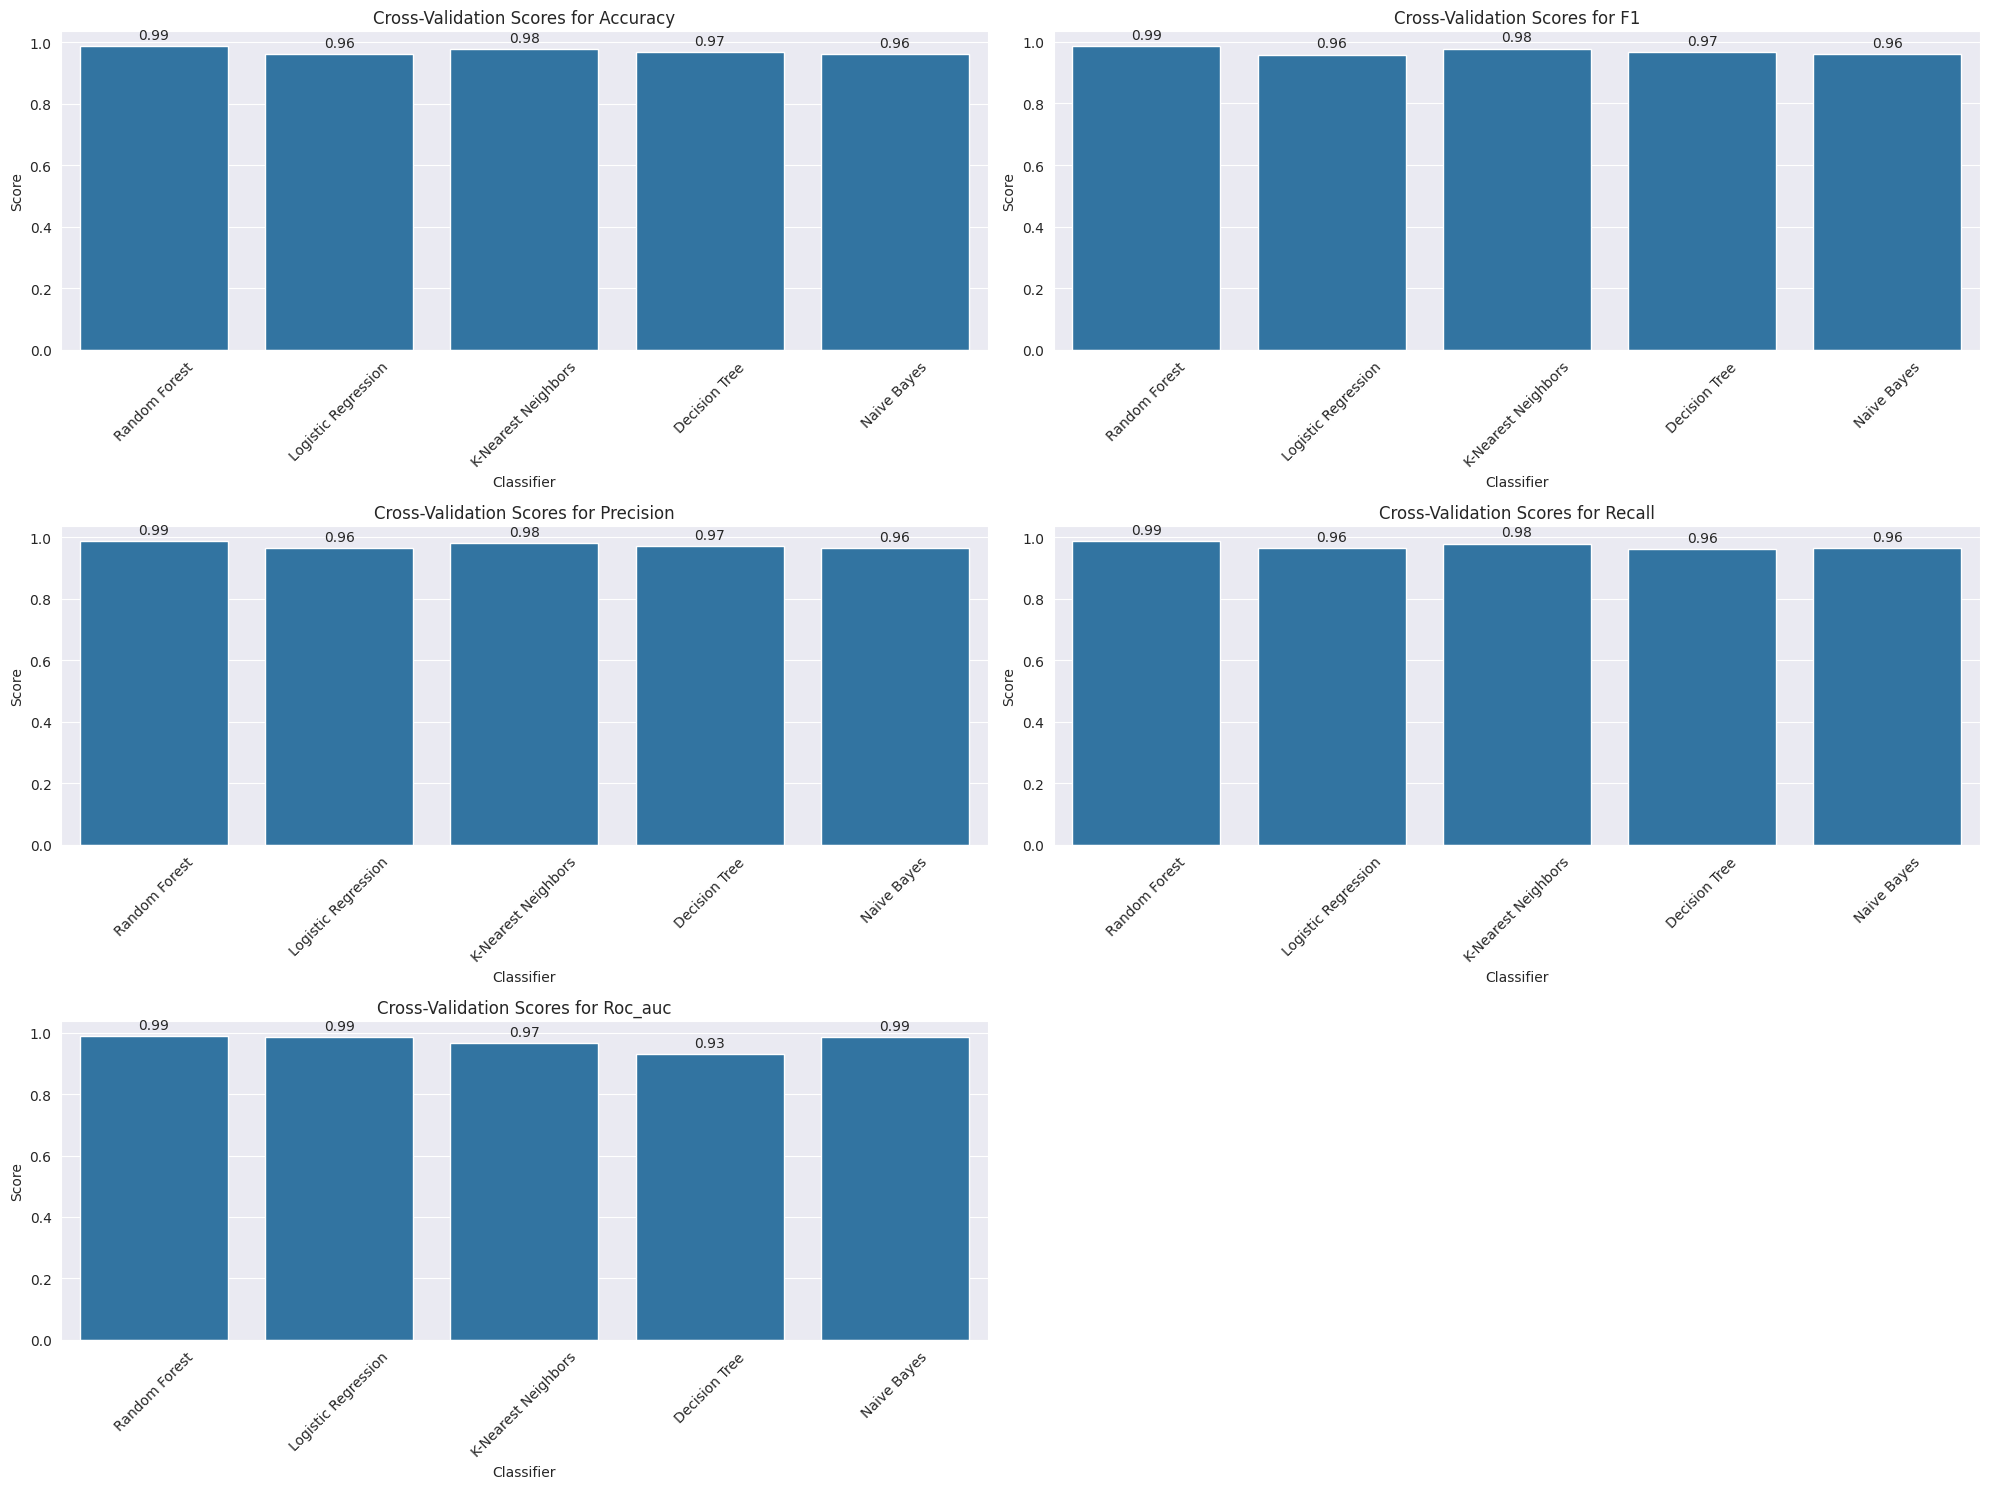

In [137]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xlabel('Classifier')
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])
# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Moderna_test.pdf')
plt.show()


# With JANSSEN as y_test


In [143]:
#created in create_embeddings
X_test = pd.read_csv('data/X_test_Janssen.csv')
y_test = pd.read_csv('data/y_test_Janssen.csv')
X_train = pd.read_csv('data/X_train_Janssen.csv')
y_train = pd.read_csv('data/y_train_Janssen.csv')

In [146]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 35
Percentage of entries in y_test that are 1: 16.59%


In [140]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [141]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


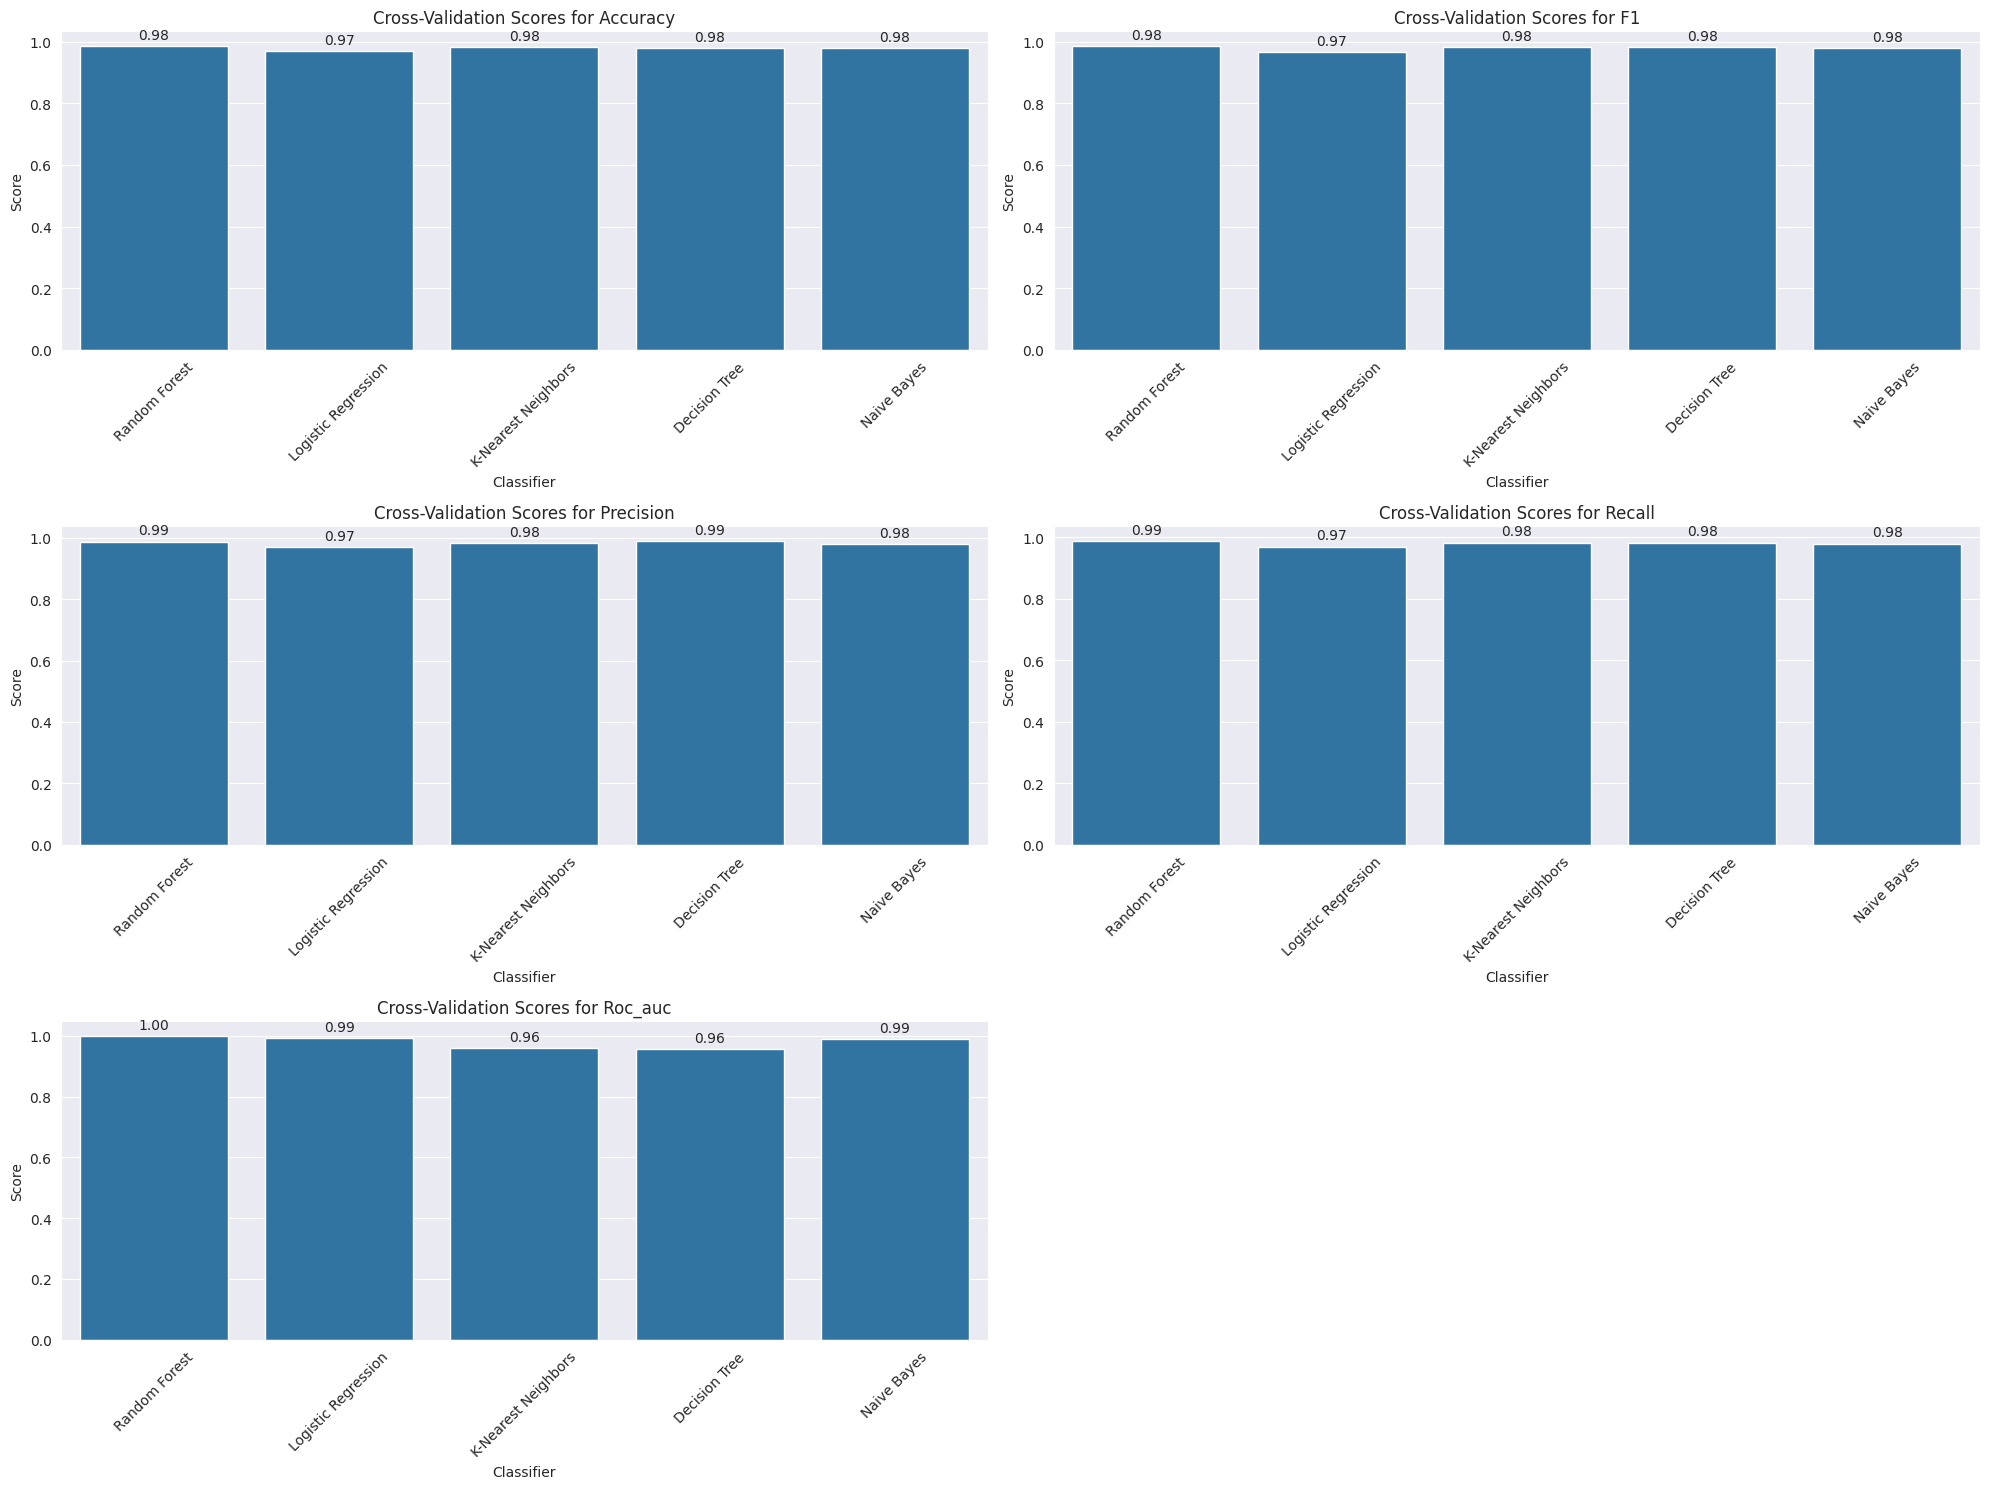

In [142]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Janssen_test.pdf')
plt.show()


# With unique symptoms in train und test

### with 5% true labels

In [7]:
import pandas as pd
X_test5 = pd.read_csv('data/X_test_unique_5.csv')
y_test5 = pd.read_csv('data/y_test_unique_5.csv')
X_train5 = pd.read_csv('data/X_train_unique_5.csv')
y_train5 = pd.read_csv('data/y_train_unique_5.csv')

In [8]:
# Count the occurrences of each value
value_counts = y_train5.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train5)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 46
Percentage of entries in y_test that are 1: 5.00%


In [9]:
from sklearn.utils import shuffle

# Shuffle train and test set
X_train5, y_train5 = shuffle(X_train5, y_train5, random_state=0)
X_test5, y_test5 = shuffle(X_test5, y_test5, random_state=0)

X_train5.to_csv('../Machine_Learning/data/X_train_unique_5_shuffled.csv', index=False)
X_test5.to_csv('../Machine_Learning/data/X_test_unique_5_shuffled.csv', index=False)
y_train5.to_csv('../Machine_Learning/data/y_train_unique_5_shuffled.csv', index=False)
y_test5.to_csv('../Machine_Learning/data/y_test_unique_5_shuffled.csv', index=False)

In [10]:
y_train5 = y_train5.values.ravel()
y_test5 = y_test5.values.ravel()

In [11]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores and predictions
results = {}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')

    # Fit the model on the training set
    clf.fit(X_train5, y_train5)
    with open(f'../Machine_Learning/Models/{name}_model_5.pkl','wb') as f:
        pickle.dump(clf, f)
    
    # Predict
    y_pred5 = clf.predict(X_test5)
    
    # Save predictions
    with open(f'../Machine_Learning/Predictions/{name}_predictions_5.pkl','wb') as f:
        pickle.dump(y_pred5, f)


Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


### with 10% true labels

In [257]:
import pandas as pd
X_test10 = pd.read_csv('data/X_test_unique_10.csv')
y_test10 = pd.read_csv('data/y_test_unique_10.csv')
X_train10 = pd.read_csv('data/X_train_unique_10.csv')
y_train10 = pd.read_csv('data/y_train_unique_10.csv')

In [258]:
X_train10

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.000753,0.003112,0.005274,0.009959,0.010090,0.009402,0.006257,0.003440,0.001474,0.000229,...,0.036859,0.012987,-0.061234,-0.004186,-0.055662,-0.014458,-0.062480,0.011197,0.065043,0.077136
1,0.000655,0.000393,0.001016,0.000917,0.001343,0.000983,0.001114,0.000983,0.000655,0.000131,...,0.057951,-0.011189,-0.071340,0.024492,-0.013903,0.029624,-0.052215,0.061242,0.041733,0.016940
2,0.001081,0.006716,0.023980,0.044062,0.044062,0.041048,0.033153,0.019034,0.005897,0.000786,...,-0.015781,-0.060033,-0.039953,0.021752,-0.013534,0.021844,-0.012677,0.073315,0.038553,0.058060
3,0.027289,0.086257,0.102310,0.121867,0.110270,0.111941,0.089140,0.055332,0.026601,0.008419,...,0.009515,-0.011975,-0.050807,0.058137,-0.042506,0.047001,-0.013710,-0.036974,0.007904,0.045888
4,0.005438,0.040753,0.092318,0.133825,0.135495,0.139623,0.117215,0.081016,0.035348,0.008092,...,0.046891,0.016539,-0.015454,0.054719,-0.051151,0.042944,0.014782,-0.048226,-0.034339,-0.002191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.000000,0.000000,0.000066,0.000000,0.000033,0.000000,0.000066,0.000000,0.000033,0.000000,...,0.016413,-0.018545,0.015682,0.034817,-0.035588,0.039436,0.039218,-0.021025,-0.049829,0.039696
456,0.000033,0.000033,0.000131,0.000131,0.000328,0.000295,0.000197,0.000131,0.000098,0.000066,...,0.040220,0.048739,-0.010477,0.011827,0.035650,0.008194,0.029793,0.043736,0.028903,-0.004004
457,0.000000,0.000000,0.000000,0.000066,0.000098,0.000262,0.000098,0.000066,0.000000,0.000000,...,-0.028485,-0.030937,0.049677,0.010117,0.011279,0.006785,0.038410,-0.035478,0.021058,0.042508
458,0.000000,0.000098,0.000295,0.000229,0.000197,0.000262,0.000098,0.000000,0.000000,0.000000,...,-0.016979,0.007631,0.032883,-0.011375,-0.032229,0.000515,-0.019708,-0.026129,-0.004718,0.002563


In [259]:
y_train10

,y_true
0,1
1,1
2,1
3,1
4,1
...,...
455,0
456,0
457,0
458,0


In [261]:
# Count the occurrences of each value
value_counts = y_train10.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train10)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 46
Percentage of entries in y_test that are 1: 10.00%


In [262]:
from sklearn.utils import shuffle

# Shuffle train and test set
X_train10, y_train10 = shuffle(X_train10, y_train10, random_state=0)
X_test10, y_test10 = shuffle(X_test10, y_test10, random_state=0)

X_train10.to_csv('../Machine_Learning/data/X_train_unique_10_shuffled.csv', index=False)
X_test10.to_csv('../Machine_Learning/data/X_test_unique_10_shuffled.csv', index=False)
y_train10.to_csv('../Machine_Learning/data/y_train_unique_10_shuffled.csv', index=False)
y_test10.to_csv('../Machine_Learning/data/y_test_unique_10_shuffled.csv', index=False)

In [263]:
y_train10 = y_train10.values.ravel()
y_test10 = y_test10.values.ravel()

In [264]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores and predictions
results = {}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')

    # Fit the model on the training set
    clf.fit(X_train10, y_train10)
    with open(f'../Machine_Learning/Models/{name}_model_10.pkl','wb') as f:
        pickle.dump(clf, f)
    
    # Predict
    y_pred10 = clf.predict(X_test10)
    
    # Save predictions
    with open(f'../Machine_Learning/Predictions/{name}_predictions_10.pkl','wb') as f:
        pickle.dump(y_pred10, f)


Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes
